<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/XTRA_NEURO_NET_EXERCISES/2_cnn_classification_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(42)

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

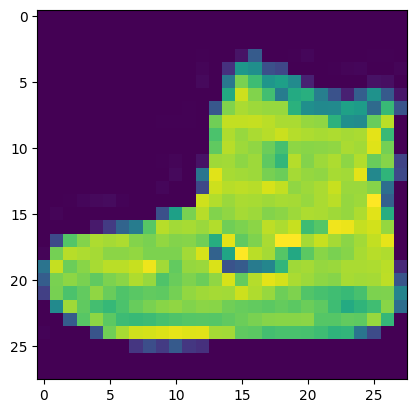

In [8]:
plt.imshow(x_train[0])

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
x_train[0].shape

(28, 28)

In [11]:
x_train.max()

255

## Process Data

In [12]:
# min = 0, max = 255, scale to values between 0, 1;
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
x_train = x_train.reshape(60000,28,28,1)


In [15]:
x_test = x_test.reshape(10000,28,28,1)

## Labels

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train)

In [18]:
y_cat_test = to_categorical(y_test,10)

## Training the Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [29]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4135 - accuracy: 0.8528 - val_loss: 0.3268 - val_accuracy: 0.8830
Epoch 2/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2790 - accuracy: 0.8986 - val_loss: 0.3243 - val_accuracy: 0.8855
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2392 - accuracy: 0.9133 - val_loss: 0.2840 - val_accuracy: 0.8973
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2113 - accuracy: 0.9226 - val_loss: 0.2706 - val_accuracy: 0.9058
Epoch 5/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1894 - accuracy: 0.9305 - val_loss: 0.2768 - val_accuracy: 0.9046
Epoch 6/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1716 - accuracy: 0.9368 - val_loss: 0.3121 - val_accuracy: 0.8997


## Evaluate the Model

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
losses = pd.DataFrame(model.history.history)

In [32]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.413531,0.852767,0.326816,0.8830
1,0.278985,0.898600,0.324329,0.8855
2,0.239197,0.913317,0.284045,0.8973
3,0.211283,0.922617,0.270617,0.9058
4,0.189396,0.930533,0.276797,0.9046


<Axes: >

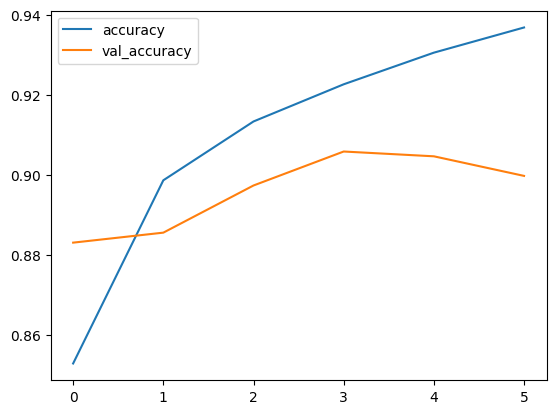

In [33]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

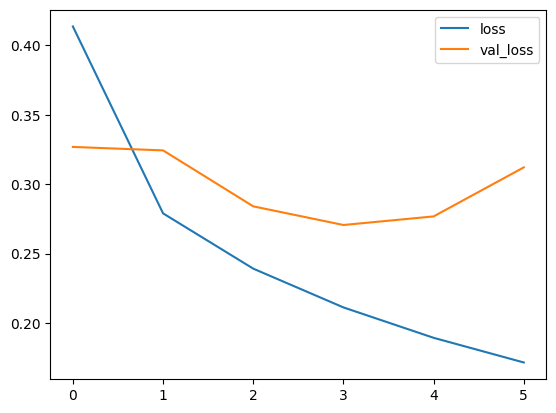

In [34]:
losses[['loss','val_loss']].plot()

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.3121013343334198, 0.8996999859809875]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [38]:
predicted_classes = np.argmax(predictions, axis=1)

In [39]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.95      0.68      0.79      1000
           3       0.89      0.94      0.91      1000
           4       0.80      0.89      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.66      0.83      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [41]:
confusion_matrix(y_test,predicted_classes)

array([[792,   1,   3,  32,   2,   0, 164,   0,   5,   1],
       [  0, 978,   0,  13,   1,   1,   5,   0,   2,   0],
       [ 18,   0, 681,  10, 137,   0, 154,   0,   0,   0],
       [  7,   4,   5, 940,  14,   0,  30,   0,   0,   0],
       [  0,   1,  12,  35, 891,   0,  60,   0,   1,   0],
       [  0,   0,   0,   0,   0, 977,   0,  14,   0,   9],
       [ 59,   0,  15,  28,  65,   0, 826,   0,   7,   0],
       [  0,   0,   0,   0,   0,  10,   0, 959,   1,  30],
       [  1,   1,   0,   3,   3,   1,   7,   1, 983,   0],
       [  0,   0,   0,   0,   0,   7,   1,  22,   0, 970]])

<Axes: >

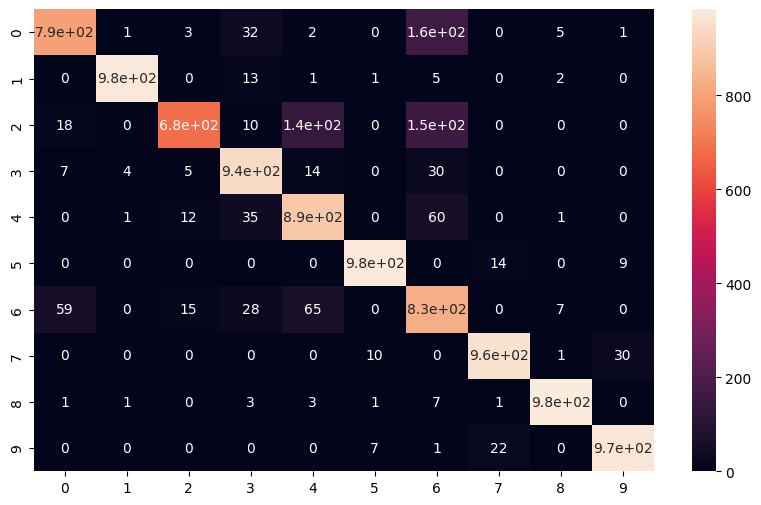

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True)

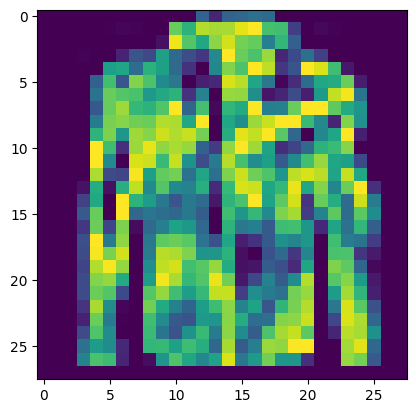

In [43]:
# prediction
my_image = x_test[17]
plt.imshow(my_image)

In [45]:
predict = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 36ms/step


In [46]:
np.argmax(predict, axis=1)

array([6])

In [48]:
y_test[17]

4